In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score,confusion_matrix
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import mutual_info_classif

In [2]:
def read(file):
    return pd.read_csv(file)

In [3]:
inuser = int(input("Enter 1 for Telco-Customer-Churn, 2 for Adult, 3 for Credit Card file: "))
if inuser == 1:
    file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    dataframe = read(file)
    dataframe  
elif inuser == 2:
    adult = fetch_ucirepo(id=2)
    dataframe = adult.data
    #print(dataframe)
elif inuser == 3:
    file = 'creditcard.csv'
    dataframe = read(file)
    print(dataframe) 

  

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [26]:
#encoding and scaling
def encoding_scaling(features,target):
        #label encoding
        encoder = LabelEncoder()
        target = encoder.fit_transform(target)
        
        #one hot encoding
        # List of columns to convert to categorical
        object_columns = features.select_dtypes(include=['object'])
        # Convert each column to categorical type
        for col in object_columns:
            features[col] = features[col].astype('category')
        features = pd.get_dummies(features)
        
        #minmax scaling
        scaler = MinMaxScaler()
        
        selected = features.select_dtypes(exclude=['bool']).columns

        features_minmax = features.copy()
        features_minmax[selected] = scaler.fit_transform(features[selected])
        return features_minmax,target

In [27]:
def data_preprocessing(input,dataframe):
    #replace empty string with NaN
    
    if input == 1 or input == 3:
        dataframe = dataframe.replace("", np.nan)
        dataframe = dataframe.replace("?", np.nan)
        #check for missing values
        dataframe.isnull().sum()
        #solving missing values numeric and non-numeric
        numeric_columns = dataframe.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            dataframe[column].fillna(dataframe[column].mean(), inplace=True)  # Replace NaN with the mean value

        non_numeric_columns = dataframe.select_dtypes(exclude=[np.number]).columns
        for column in non_numeric_columns:
            dataframe[column].fillna(dataframe[column].mode()[0], inplace=True)
    
    
        #check for duplicate values
        dataframe[dataframe.duplicated(keep=False)]
        #drop duplicate values
        dataframe.drop_duplicates(inplace=True)
    
    elif input == 2:
        # Replace empty string or '?' with NaN
        features = dataframe.features
        features = features.replace("?", np.nan)    
        target = dataframe.target 
        
        features.isnull().sum()
        
        numeric_columns = features.select_dtypes(include=[np.number]).columns
        for column in numeric_columns:
            features[column].fillna(features[column].mean(), inplace=True)  # Replace NaN with the mean value

        non_numeric_columns = features.select_dtypes(exclude=[np.number]).columns
        for column in non_numeric_columns:
            features[column].fillna(features[column].mode()[0], inplace=True)
    
    
        #check for duplicate values
        features[features.duplicated(keep=False)]
        duplicates = features.duplicated()
        target = adult.data.targets


        target = target[~duplicates]
        #drop duplicate values
        features.drop_duplicates(inplace=True)

    
    if input == 1:
        #drop customerID column
        dataframe.drop('customerID', axis=1, inplace=True)
        features = dataframe.drop('Churn', axis=1)
        target = dataframe['Churn']
        
        features_minmax,target = encoding_scaling(features,target)
        
        target_df = pd.DataFrame(target, columns=['Churn'])
        print(features_minmax)
        features_df1 = pd.DataFrame(features_minmax, columns=features_minmax.columns) # with min_max scaling
        #print("here")
        print(features_df1)
        bool_columns = features_df1.select_dtypes(include=[bool]).columns
        features_df1[bool_columns] = features_df1[bool_columns].astype(int)
        

    elif input == 2:
        mapping = {
            '<=50K': 0,
            '>50K': 1,
            '<=50K.': 0,
            '>50K.': 1
            }
        target = np.vectorize(mapping.get)(target)
        
        object_columns = features.select_dtypes(include=['object'])
        # Convert each column to categorical type
        for col in object_columns:
            features[col] = features[col].astype('category')
        features = pd.get_dummies(features)
        #minmax scaling
        scaler = MinMaxScaler()
        
        selected = features.select_dtypes(exclude=['bool']).columns

        features_minmax = features.copy()
        features_minmax[selected] = scaler.fit_transform(features[selected])
        features_df1 = pd.DataFrame(features_minmax, columns=features_minmax.columns)
        
    elif input == 3:    
        features = dataframe.drop('Class', axis=1)
        target = dataframe['Class']
        
        features_minmax,target = encoding_scaling(features,target)
        target_df = pd.DataFrame(target, columns=['Class'])
        features_df1 = pd.DataFrame(features_minmax, columns=features_minmax.columns) # with min_max scaling
        bool_columns = features_df1.select_dtypes(include=[bool]).columns
        features_df1[bool_columns] = features_df1[bool_columns].astype(int)
               
    
    return features_df1, target
    
  
    
features_update, target_update = data_preprocessing(inuser,dataframe=dataframe)  



#correlation
#target_daf = pd.DataFrame(target_update, columns=['Class'])
# Calculate the correlation between the features and the target (min-max scaling)
#target_series = target_daf['Class'] 
#correlations = features_update.corrwith(target_series)
#nan_columns = correlations1[correlations1.isna()].index # Check for any NaN values in the correlations
#correlations = correlations.dropna() #dropping NaN correlations
#correlations = correlations.abs().sort_values(ascending=False)
#feature_updt = features_update[correlations.index] # Select the features with the highest correlation

#top_70_features = correlations.abs().sort_values(ascending=False).head(70)
#top_70_features_ind = top_70_features.index.tolist() #min-max scaling
#feature_updt = features_update[top_70_features_ind]


#informtion gain {for 1st Dataset target = Churn , for 2nd Dataset target = income and for 3rd Dataset target = Class}
#target_daf = pd.DataFrame(target_update, columns=['income'])
#target_series = target_daf['income'] 
#mi_scores = mutual_info_classif(features_update, target_series, random_state=42)
#mi_scores_df = pd.DataFrame(mi_scores, index=features_update.columns, columns=['MI Score'])
#mi_score_ind  = mi_scores_df.sort_values(by='MI Score', ascending=False).index.tolist()
#feature_updt = features_update[mi_score_ind]

#top_70_features = mi_scores_df.sort_values(by='MI Score', ascending=False).head(70)
#top_70_features_ind = top_70_features.index.tolist()


#Select the top features from the original features DataFrame
#feature_updt = features_update[top_70_features_ind]


norm = Normalizer()
features_daf1_normalized = norm.fit_transform(features_update) #without correlation or information gain
#features_daf1_normalized = norm.fit_transform(feature_updt)

features_daf1_normalized


  

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13628\1678007731.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(dataframe[column].mean(), inplace=True)  # Replace NaN with the mean value


array([[0.00000000e+00, 3.07579586e-01, 2.52094458e-01, ...,
        1.37798933e-01, 1.02844193e-01, 1.91541332e-03],
       [0.00000000e+00, 3.20162900e-01, 2.51953195e-01, ...,
        1.36221312e-01, 1.02546762e-01, 3.42578513e-05],
       [1.91740374e-06, 3.09848648e-01, 2.49516941e-01, ...,
        1.37656591e-01, 1.03339971e-01, 4.88318209e-03],
       ...,
       [3.10754361e-01, 3.07935120e-01, 2.37446594e-01, ...,
        1.29461143e-01, 9.71393583e-02, 8.21079871e-04],
       [3.05549117e-01, 2.91564467e-01, 2.36150856e-01, ...,
        1.27881235e-01, 9.63251094e-02, 1.18934369e-04],
       [3.16572410e-01, 3.00500586e-01, 2.42259063e-01, ...,
        1.31841763e-01, 9.92140604e-02, 2.67392415e-03]])

#Logistic Regression

In [28]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization  # 'l1', 'l2', or None
        self.lambda_ = lambda_  # Regularization strength
    
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        
        for _ in range(self.num_iterations):
            # Linear model: z = Xw + b
            z = np.dot(X, self.weights) + self.bias
            
            # Sigmoid function
            y_pred = sigmoid(z)
            
            # Compute the gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            # Apply regularization
            if self.regularization == "l2":
                # L2 Regularization (Ridge): Add lambda * weights to dw
                dw += (self.lambda_ / num_samples) * self.weights
            elif self.regularization == "l1":
                # L1 Regularization (Lasso): Add lambda * sign(weights) to dw
                dw += (self.lambda_ / num_samples) * np.sign(self.weights)
            
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    # binary outcomes (0 or 1)
    def predict(self, X):
        # Linear model: z = Xw + b
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        # Convert probabilities to binary predictions (0 or 1)
        return [1 if i > 0.5 else 0 for i in y_pred]
    
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

X_train,X_test,y_train,y_test=train_test_split(features_daf1_normalized,target_update, test_size=0.2,random_state=42)

y_train = y_train.ravel()  
y_test = y_test.ravel()    

model = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='l2', lambda_=0.01)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


model.fit(X_train, y_train)
predictions = model.predict(X_test)
acc = accuracy(y_test, predictions)
sensitivity = recall_score(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, predictions)
f_1_score = f1_score(y_test, predictions)
auroc_score = roc_auc_score(y_test, predictions)
aupr = average_precision_score(y_test, predictions)

print(f"Accuracy: {acc}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f_1_score}")
print(f"AUROC: {auroc_score}")
print(f"AUPR: {aupr}")

Shape of X_train: (226980, 30)
Shape of y_train: (226980,)
Accuracy: 0.998413985126705
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
AUROC: 0.5
AUPR: 0.0015860148732950341


d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Bagging


In [29]:
num_bagging_samples = 9

logistic_models = []
for i in range(num_bagging_samples):
    # Create a bootstrap sample
    bagging_indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train[bagging_indices]
    y_bootstrap = y_train[bagging_indices]

    # Train a new Logistic Regression model on the bootstrap sample
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='l2', lambda_=0.01)
    model.fit(X_bootstrap, y_bootstrap)
    
    # Append the trained model to the array
    logistic_models.append(model)
def aggregate_predictions(models, X_test):
    
    predictions = []
    for model in models:
        predictions.append(model.predict(X_test))
    
    
    predictions = np.array(predictions)
    
    
    final_predictions = np.round(np.mean(predictions, axis=0))  # Majority voting
    return final_predictions

# final predictions using the aggregate predictions from all models
final_predictions = aggregate_predictions(logistic_models, X_test)


bagging_acc = accuracy(y_test, final_predictions)
print(f"Bagging Logistic Regression Accuracy: {bagging_acc:.2f}")



Bagging Logistic Regression Accuracy: 1.00


In [30]:
accuracy_list = []
precision_list = []
f1_list = []
sensitivity_list = []
specificity_list = []
auroc_list = []
aupr_list = []

# Evaluate each bagged Logistic Regression model
for model in logistic_models:
    # Get predictions for each model on the test set
    y_pred = model.predict(X_test)
    
    
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    sensitivity_list.append(recall_score(y_test, y_pred))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity_list.append(tn / (tn + fp))
    auroc_list.append(roc_auc_score(y_test, y_pred))
    aupr_list.append(average_precision_score(y_test, y_pred))
    

# Convert the lists to NumPy arrays
accuracy_list = np.array(accuracy_list)
precision_list = np.array(precision_list)
f1_list = np.array(f1_list)
sensitivity_list = np.array(sensitivity_list)
specificity_list = np.array(specificity_list)
auroc_list = np.array(auroc_list)
aupr_list = np.array(aupr_list)

d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\L

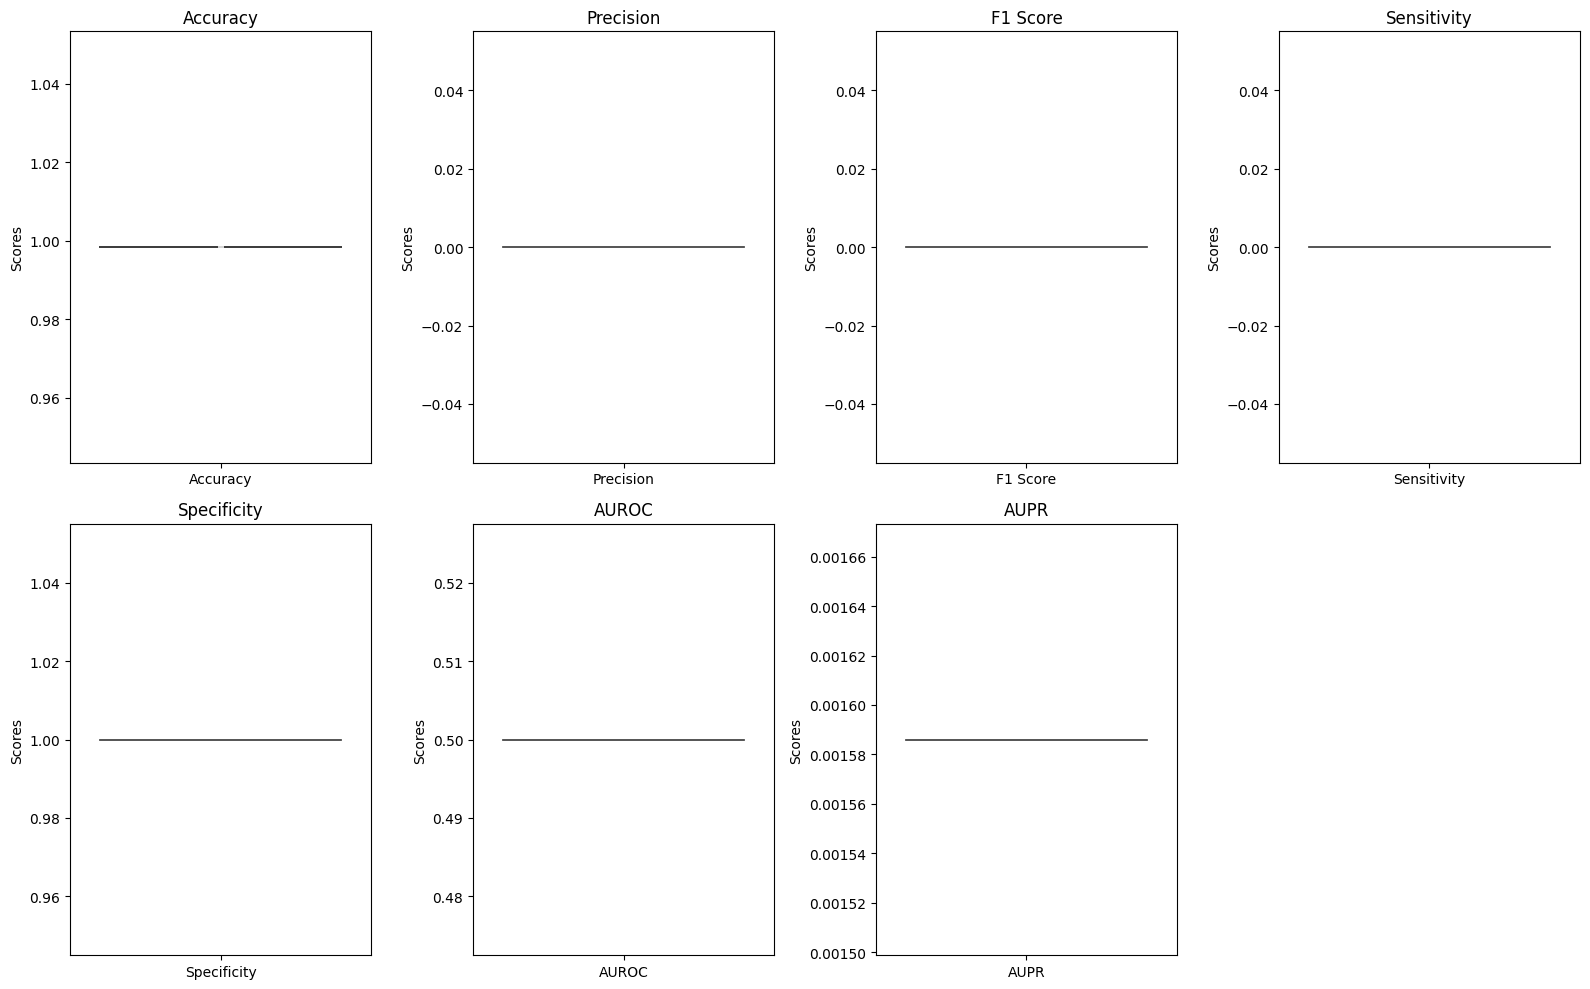

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store all performance metrics
metrics_df = pd.DataFrame({
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'F1 Score': f1_list,
    'Sensitivity' : sensitivity_list,
    'Specificity' : specificity_list,
    'AUROC' : auroc_list,
    'AUPR' : aupr_list
})

metrics = ['Accuracy', 'Precision', 'F1 Score', 'Sensitivity', 'Specificity', 'AUROC', 'AUPR']
colors = ['yellow', 'lightblue', 'lightgreen', 'orange', 'purple', 'pink', 'red']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))  # 2 rows and 4 columns layout
axes = axes.flatten()  # Flatten the axes array


for i, metric in enumerate(metrics):
    sns.violinplot(data=metrics_df[[metric]], ax=axes[i], color=colors[i])
    axes[i].set_title(f'{metric}')
    axes[i].set_ylabel('Scores')
    axes[i].set_xlabel('')

# Remove the extra subplot (as we have 7 metrics but 8 subplots)
fig.delaxes(axes[-1])


plt.tight_layout()
plt.show()

In [32]:
X_base_train, X_meta_train_split, y_base_train, y_meta_train_split = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

def generate_meta_features(models, X):
    meta_features = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        meta_features[:, i] = model.predict(X)
    return meta_features

X_meta_train = generate_meta_features(logistic_models, X_meta_train_split)
X_meta_test = generate_meta_features(logistic_models, X_test)

# Concatenate X_meta_train and X_meta_train_split
X_meta_combined = np.concatenate((X_meta_train, X_meta_train_split), axis=1)
X_meta_combined_test = np.concatenate((X_meta_test, X_test), axis=1)

# print(X_meta_train.shape)
# print(X_meta_train_split.shape)
# print(X_meta_combined.shape)
# print(X_meta_test.shape)
# print(X_test.shape)
# print(f"y_meta_train_split shape: {y_meta_train_split.shape}")

# Train a Logistic Regression model on the meta features

meta_model = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='l2', lambda_=0.01)
meta_model.fit(X_meta_combined, y_meta_train_split)
meta_predictions = meta_model.predict(X_meta_combined_test)
stacking_acc = accuracy(y_test, meta_predictions)
print(f"Stacking Ensemble Accuracy: {stacking_acc:.2f}")

sensitivity = recall_score(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, predictions)
f_1_score = f1_score(y_test, predictions)
auroc_score = roc_auc_score(y_test, predictions)
aupr = average_precision_score(y_test, predictions)

print(f"Accuracy: {stacking_acc}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f_1_score}")
print(f"AUROC: {auroc_score}")
print(f"AUPR: {aupr}")

Stacking Ensemble Accuracy: 1.00
Accuracy: 0.998413985126705
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
AUROC: 0.5
AUPR: 0.0015860148732950341


d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Majority Voting
def majority_voting(models, X_test):
    # Collect predictions from all models
    predictions = np.zeros((X_test.shape[0], len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X_test)
    
    
    final_predictions = np.round(np.mean(predictions, axis=1))
    return final_predictions

voting_predictions = majority_voting(logistic_models, X_test)


voting_acc = accuracy(y_test, voting_predictions)

sensitivity = recall_score(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn + fp)
precision = precision_score(y_test, predictions)
f_1_score = f1_score(y_test, predictions)
auroc_score = roc_auc_score(y_test, predictions)
aupr = average_precision_score(y_test, predictions)

print(f"Accuracy: {voting_acc}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")
print(f"F1 Score: {f_1_score}")
print(f"AUROC: {auroc_score}")
print(f"AUPR: {aupr}")

Accuracy: 0.998413985126705
Sensitivity: 0.0
Specificity: 1.0
Precision: 0.0
F1 Score: 0.0
AUROC: 0.5
AUPR: 0.0015860148732950341


d:\LEVEL 4 TERM 2\CSE 472\Assignment 2\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
